In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../csvs/MD17_Energy.csv')

# No energy validation data
df.drop('GemNet(Q)', axis=1, inplace=True)
df.drop('GemNet(T)', axis=1, inplace=True)

df.head()

,MD17_molecules,SchNet,DimeNet,PhysNet,PaiNN(F),PaiNN(F+E),ENINet,SpookyNet,NequIP(l=3),NewtonNet,SO3krates,sGDML,ViSNet
0,Aspirin,0.37,0.204,0.23,0.167,0.159,0.148,0.151,0.131,0.168,0.139,0.19,0.116
1,Benzene,0.08,0.078,x,x,x,0.074,x,x,x,x,0.10,x
2,Ethanol,0.08,0.064,0.059,0.064,0.063,0.043,0.052,0.051,0.078,0.052,0.07,0.051
3,Malonaldehyde,0.13,0.104,0.094,0.1,0.091,0.071,0.079,0.076,0.096,0.077,0.10,0.075
4,Naphthalene,0.16,0.122,0.142,0.116,0.117,0.077,0.116,0.113,0.118,0.115,0.12,0.085


In [3]:
label_colors = {
    'SchNet':      ['SchNet'         ,'#1f77b4'],  # muted blue
    'DimeNet':     ['DimeNet'        ,'#d62728'],  # safety orange
    'PhysNet':     ['PhysNet'        ,'#8c6d31'],  # cooked asparagus green
    'GemNet(Q)':   ['GemNet (Q)'     ,'#843c39'],  # brick red
    'GemNet(T)':   ['GemNet (T)'     ,'orange' ],  #
    'PaiNN(F)':    ['PaiNN (F)'      ,'#5254a3'],  # chestnut brown
    'PaiNN(F+E)':  ['PaiNN (F+E)'    ,'#7f7f7f'],  # raspberry yogurt pink
    'ENINet':      ['ENINet'         ,'#e377c2'],  # middle gray
    'SpookyNet':   ['SpookyNet'      ,'#bcbd22'],  # curry yellow-green
    'NequIP(l=0)': ['NequIP ($l=0$)' ,'#2ca02c'],  # blue-teal
    'NequIP(l=1)': ['NequIP ($l=1$)' ,'#393b79'],  # dark muted blue
    'NequIP(l=2)': ['NequIP ($l=2$)' ,'red'    ],  #
    'NequIP(l=3)': ['NequIP ($l=3$)' ,'#17becf'],  # dark mustard
    'MACE':        ['MACE'           ,'#ff7f0e'],  # dark brick red
    'NewtonNet':   ['NewtonNet'      ,'#7b4173'],  # dark purple
    'Allegro':     ['Allegro'        ,'#9467bd'],  # soft blue
    'SO3krates':   ['SO3krates'      ,'#6b6ecf'],  # soft purple
    'FCHL19':      ['FCHL19'         ,'#9c9ede'],  # light lavender
    'GAP(SOAP)':   ['GAP(SOAP)'      ,'#8ca252'],  # light olive green
    'sGDML':       ['sGDML'          ,'#b5cf6b'],  # pastel green
    'ACE':         ['ACE'            ,'violet' ], #
    'MGNN':        ['MGNN'           ,'black'  ], #
    'ViSNet':      ['ViSNet'         ,'cyan'   ], #
} 

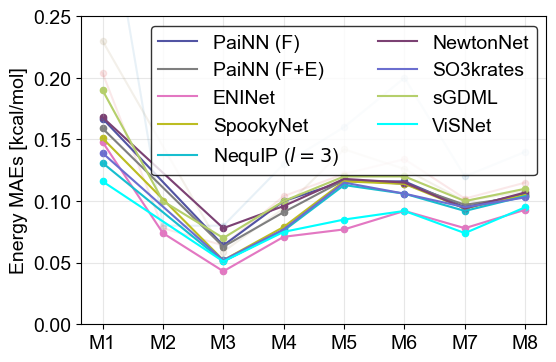

In [4]:
plt.rcParams.update({'font.size':14})
plt.rcParams['font.family']='Arial'
fig,ax = plt.subplots(figsize=(6,4))

x = [0,1,2,3,4,5,6,7]
mae_cutoff = 0.2 # kcal/mol

for i_col in range(1,len(df.columns)):

    column = df.iloc[:, i_col]        
    column_name = df.columns[i_col]   

    x_new = []
    y_new = []

    for i in range(len(x)):
        if column[i] != 'x': 
            x_new.append(x[i])
            y_new.append(float(column[i]))

    if all(y <= mae_cutoff for y in y_new):
        ax.plot(x_new,y_new,label=label_colors[column_name][0],color=label_colors[column_name][1],alpha=1)
        ax.scatter(x_new,y_new,color=label_colors[column_name][1],s=20)
    if any(y <= mae_cutoff for y in y_new):
        ax.plot(x_new,y_new,color=label_colors[column_name][1],alpha=0.1)
        ax.scatter(x_new,y_new,color=label_colors[column_name][1],s=20,alpha=0.1)


ax.set_ylim([0.0,mae_cutoff+0.05])

ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(['M1','M2','M3','M4','M5','M6','M7','M8'])
# ax.set_xticklabels(['Aspirin','Azobenzene','Benzene','Ethanol','Malonaldehyde','Naphthalene','Paracetamol','Salicylic Acid','Toluene','Uracil'],rotation=60,fontsize=8)

ax.set_ylabel('Energy MAEs [kcal/mol]')

ax.legend(edgecolor='black', facecolor='white', loc='upper right', ncol=2)
ax.grid(alpha=0.3)

plt.savefig('MD17_E.pdf',format='pdf',bbox_inches='tight')

plt.show()